#### What are the fewest number and spacing of measurements we'd need to accurately characterize the wind stress on Mars' surface?

The Law of the Wall describes the wind profile $u(z)$ as a function of height $z$:
$$
u(z) = \left( \dfrac{u^*}{\kappa} \right)\ln \left( \dfrac{z}{z_0} \right),
$$
where $u^*$ is the friction velocity, $\kappa$ Von Karman's constant (0.4), and $z_0$ the roughness length. The relationship between surface wind stress $\tau$ and friction velocity is $u^* = \sqrt{\tau/\rho}$, with $\rho$ the atmospheric density.

We can re-cast this equation as a linear equation:
$$
u(x) = a x + b
$$
with $x = \ln z$, $a = \dfrac{u^*}{\kappa}$, and $b = -\dfrac{u^*}{\kappa} \ln z_0$.

Looking at _Numerical Recipes_, section 15.2, we see the equations I need to estimate uncertainties on $a$ and $b$.

In [65]:
import numpy as np

class Linear_Regression:
    
    def __init__(self, z, u, sigma):
        self.z = z
        self.x = np.log(z)
        self.u = u
        self.y = u
        self.sigma = sigma

    def S(self):
        return np.sum(1./self.sigma**2)
    
    def Sx(self):
        return np.sum(self.x/self.sigma**2.)
    
    def Sy(self):
        return np.sum(self.y/self.sigma**2.)
    
    def Sxx(self):
        return np.sum(self.x**2/self.sigma**2)
    
    def Sxy(self):
        return np.sum(self.x*self.y/self.sigma**2)
    
    def Delta(self):
        return self.S()*self.Sxx() - self.Sx()**2
    
    def calc_intercept(self):
        return (self.Sxx()*self.Sy() - self.Sx()*self.Sxy())/self.Delta()
        
    def calc_slope(self):
        return (self.S()*self.Sxy() - self.Sx()*self.Sy())/self.Delta()
    
    def calc_intercept_uncertainty(self):
        return self.Sxx()/self.Delta()
    
    def calc_slope_uncertainty(self):
        return self.S()/self.Delta()
    
    def calc_everything(self):
        return [self.calc_slope(), self.calc_intercept(), 
                self.calc_slope_uncertainty(), self.calc_intercept_uncertainty()]

2.5 25.09731380857808


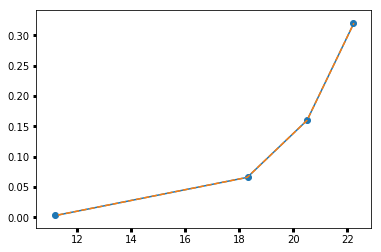

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
from numpy.random import normal

def law_of_the_wall(z, z0, ustar, kappa=0.4):
    return ustar/kappa*np.log(z/z0)

# generate synthetic data

z = np.array([4e-3, 66e-3, 160e-3, 320e-3]) # m - values inspired by Swann et al. (2020)
z0 = 1310e-6/30. # m
ustar = 1. # m/s
sigma = ustar/10.
kappa = 0.4
u = law_of_the_wall(z, z0, ustar)
noisy_u = u + normal(size=len(z), scale=sigma)

slope = ustar/kappa
intercept = -ustar/kappa*np.log(z0)
print(slope, intercept)

plt.plot(u, z)
plt.plot(np.polyval([slope, intercept], np.log(z)), z, ls='--')
plt.scatter(noisy_u, z)

In [84]:
x = np.exp(np.linspace(0, 1, 100))
y = 1.*np.log(x) + 1.
lr = Linear_Regression(x, y, sigma)
print(lr.calc_slope())

3.0068937273906213
